In [1]:
import os
global notebook
notebook=1

#Set directory of Python
dir = r"C:\Users\Beverly\Documents\HAMR_macros"
os.chdir(dir) #hamr
#Compile python toolkit
%run -i C:\Users\Beverly\Documents\HAMR_macros\pp.py do_nothing
%run -i C:\Users\Beverly\Documents\HAMR_macros\timeavg_functions.ipynb
%matplotlib inline

#Set parameters for all simulations loaded
lowres1 = 1
lowres2 = 1
lowres3 = 1
do_box=0
r_min=0.0
r_max=100.0
theta_min=0.0
theta_max=9
phi_min=-1
phi_max=9
axisym=1 
print_fieldlines=0 
export_raytracing_GRTRANS=0 
export_raytracing_RAZIEH=0
interpolate_var=0
kerr_schild=0
DISK_THICKNESS=0.03 
set_cart=0 
set_mpi(0) 
check_files=1
notebook=1

C:\Users\Beverly\Documents\HAMR_macros\pp.py:38: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r"\usepackage{amssymb,amsmath}"]


In [2]:
### Make a dictionary for each spin

# uncooled
an9_vtime={}
an5_vtime={}
a0_vtime={}
a2_vtime={}
a3_vtime={}
a5_vtime={}

# cooled
an9c_vtime = {}
an5c_vtime = {}
a0c_vtime = {}
a2c_vtime = {}
a3c_vtime = {}
a5c_vtime = {}
a94c_vtime = {}

In [34]:
# Set directory to save to
savedir = r"D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled"

# Set name of file
savefile = r"a94c_vt_spacetime"

# Set range for calculation and step size
istart = 0
iend = 500
istep = 1

# Value of bsq/rho to define the disk
diskcut=30

dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'


os.chdir(dir)

In [35]:
# Initialize arrays
phibh_vt = []
Phibh_vt = []
t_vt = []
fM_vt = []
fEM_vt = []
Sigma_vt = []
Sigma_vt_2 = []

# Begin calculating at every time step

## Quantity vs. time and spacetime

In [14]:
for i in range(istart, iend+1, istep):
    os.chdir(dir) 
    #Run read-in of data
    rblock_new(i)
    rpar_new(i)
    rgdump_griddata(dir)
    rdump_griddata(dir,i)

    misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
    psicalc(0,0)

    ###Fluxes
    calc_phibh()
    calc_Mdot(diskcut) # Mdot, Mdot_disk
    calc_Edot(diskcut)

    fEtotEM = Edot_EMtot[0]
    fM = Mdot[0]
    PhiBH = phibh[0]
    
    #Phibh_rhor=PhiBH[iofr(rhor)]
    Phibh_vt.append(PhiBH)
    t_vt.append(t)
    fEM_vt.append(fEtotEM)
    fM_vt.append(fM[iofr(7)])
    phibh_vt.append(PhiBH*np.sqrt(4*np.pi)/np.sqrt(fM[iofr(7)]))
    
    Sigma_vt.append((gdet*rho*uu[0]*r*_dx2*_dx3).sum(-1).sum(-1))
    Sigma_vt_2.append((gdet*rho*uu[0]*_dx2*_dx3).sum(-1).sum(-1))
    
    print(t)

0.0
50.00348658160458
100.0614274415324
150.07133490263016
200.05398267143295
250.05236198466937
300.03266823992874
350.1505081438918
400.04159265823523
450.03091348044774
500.126771607443


### Spacetime diagrams

In [37]:
#Area = metricGR["gdet_Phy"] * metricGR["_dx2"]
r_cells = len(r[0,:,ny//2,0])

time = np.zeros((iend - istart) // istep)
Phi_st = np.zeros(((iend - istart) // istep, r_cells), dtype=float)
Mdot_st = np.zeros(((iend - istart) // istep, r_cells), dtype=float)
Sig_st = np.zeros(((iend - istart) // istep, r_cells), dtype=float)
Sig_st_2 = np.zeros(((iend - istart) // istep, r_cells), dtype=float)

for i in range(istart, iend, istep):
    
    #Run read-in of data
    rblock_new(i)
    rpar_new(i)
    rgdump_griddata(dir)
    rdump_griddata(dir,i)

    misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
    psicalc(0,0)

    ###Fluxes
    calc_phibh()
    calc_Mdot(diskcut) # Mdot, Mdot_disk
    calc_Edot(diskcut)

    fEtotEM = Edot_EMtot[0]
    fM = Mdot[0]
    PhiBH = phibh[0]
    
    #Phibh_rhor=PhiBH[iofr(rhor)]
    Phibh_vt.append(PhiBH)
    t_vt.append(t)
    fEM_vt.append(fEtotEM)
    fM_vt.append(fM[iofr(7)])
    phibh_vt.append(PhiBH*np.sqrt(4*np.pi)/np.sqrt(fM[iofr(7)]))
    
    Sigma_vt.append((gdet*rho*uu[0]*r*_dx2*_dx3).sum(-1).sum(-1))
    Sigma_vt_2.append((gdet*rho*uu[0]*_dx2*_dx3).sum(-1).sum(-1))
    
    print(t)
    
    #Phifield = dict(np.load(rep + "PhiAve/Phifield" + str(i) + ".npz", mmap_mode="r"))

    #time[(i - istart) // istep] = i * 10
    time[i] = t
    #Aphi = Tls.Calc_Aphi(
    #    Phifield["Bx1"] / np.sqrt(metricGR["gcov"][1, 1]),
    #    metricGR["gdet"] * metricGR["_dx2"],
    #    len(r),
    #    len(th),
    #)
    
    fM_st = fM
    phibh_st = phibh[0]*np.sqrt(4*np.pi)/np.sqrt(fM[iofr(7)])
    Sigma_st = (gdet*rho*uu[0]*r*_dx2*_dx3).sum(-1).sum(-1)
    Sigma_st_2 = (gdet*rho*uu[0]*_dx2*_dx3).sum(-1).sum(-1)
    
    #Psi[(i - istart) // istep, :] = Aphi[:, len(th) // 2]
    Phi_st[(i - istart) // istep, :] = phibh[0]
    Mdot_st[(i - istart) // istep, :] = fM_st
    Sig_st[(i - istart) // istep, :] = Sigma_st
    Sig_st_2[(i - istart) // istep, :] = Sigma_st_2

0.0
25.160934885709167
50.173894807561034
75.02797951195582
100.06296174366234
125.08135013322173
150.0455655856818
175.11491730477306
200.02495781796154
225.00355121182398
250.031012824259
275.0317765411844
300.0760547454385
325.09259040881585
350.0758745175955
375.04222953625276
400.0797719443295
425.0555408839979
450.0913419123552
475.0032348432859
500.02958646494733
525.0087786789259
550.095778636449
575.0934900248731
600.0740365512736
625.0903588290134
650.0489399730589
675.0451486920073
700.016732499272
725.025806965586
750.0285437003093
775.0851080730339
800.0648175629653
825.0462008466317
850.0465480583817
875.0932736172662
900.0227259278007
925.0869415450035
950.0609367624847
975.0018671032684
1000.0609199439684
1025.0234671662267
1050.020769275916
1075.0467399320096
1100.077398917039
1125.0581326429217
1150.02696729664
1175.0411291177493
1200.0269055928304
1225.0072955917997
1250.0162743413255
1275.0722411174986
1300.0013934957822
1325.010995368581
1350.0151960537287
1375.002

C:\Users\Beverly\Documents\HAMR_macros\pp.py:35: RuntimeWarning: invalid value encountered in sqrt
  from distutils.dir_util import copy_tree
C:\Users\Beverly\Documents\HAMR_macros\pp.py:54: RuntimeWarning: invalid value encountered in sqrt
  if mpl.get_backend() != "module://ipykernel.pylab.backend_inline":


12100.002198097927
12125.011105649222
12150.001870580285
12175.007551247842
12200.001286809553
12225.01559523855
12250.008269897398
12275.0055059412
12300.011039150602
12325.013808678495
12350.00920607494
12375.00764036493
12400.001428635891
12425.002959668964
12450.01198445205
12475.01348261377


## Save arrays to the dictionaries and save all to a file

In [ ]:
spin_vt["phiBH"] = np.array(phibh_vt)
spin_vt["PhiBH"] = np.array(Phibh_vt)
spin_vt["t"] = np.array(t_vt)
spin_vt["fM"] = np.array(fM_vt)
spin_vt["fEM"] = np.array(fEM_vt)
spin_vt["Sigma"] = np.array(Sigma_vt)
spin_vt["Sigma_2"] = np.array(Sigma_vt_2)

In [ ]:
# Check that data are saved to the right directory
print(savedir + "/" + savefile)
print(a)

In [ ]:
fullpath = savedir + "/" + savefile
np.savez(fullpath % i, **spin_vt)

# Plot spacetime diagrams

### $\dot{M}$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup
C:\Users\Beverly\Documents\HAMR_macros\pp.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  import pdb


Text(0.5, 0, '$R[r_g]$')

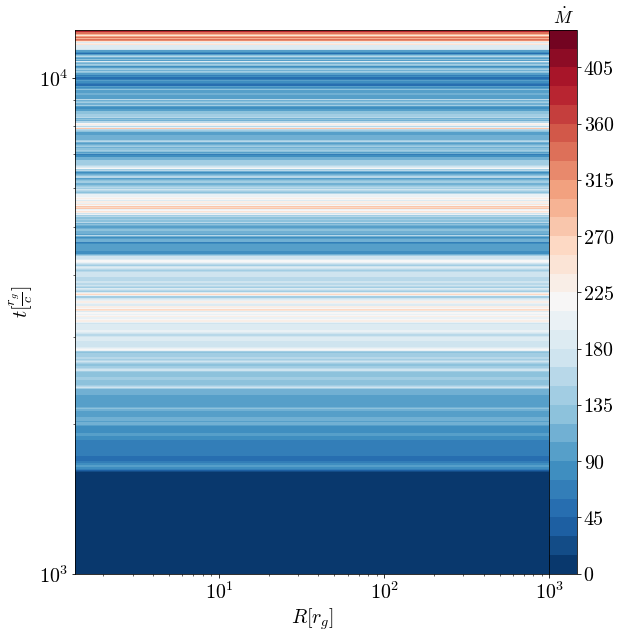

In [40]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 5
# print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Mdot_n = Mdot_st

#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
    Mdot_n[:, :],
    32,
    cmap="RdBu_r",
)

# plt.plot(r,30*r**(1.1),lw=1.2,ls=':',color='black')
#plt.plot(r, 55 * r ** (1.1), lw=2, ls=":", color="black")

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\dot{M}$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 1e3)
plt.ylim(1e3, np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

### $\Phi_{BH}$

12475.01348261377
0.0


C:\Users\Beverly\Documents\HAMR_macros\pp.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup
C:\Users\Beverly\Documents\HAMR_macros\pp.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  mpl.rcParams['text.latex.preamble'] = [r"\usepackage{amssymb,amsmath}"]
C:\Users\Beverly\Documents\HAMR_macros\pp.py:50: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  mpl.rcParams['font.family'] = 'serif'


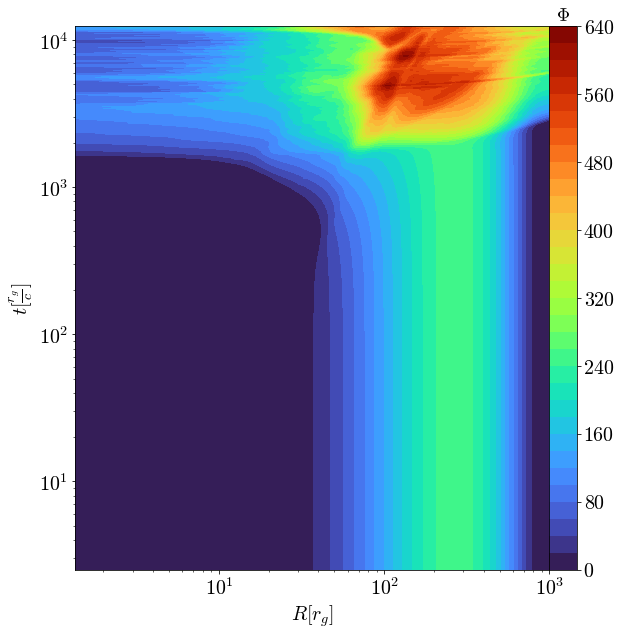

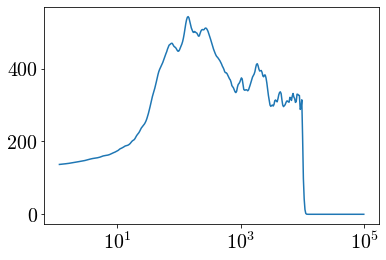

In [74]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 5
print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Phi_n = Phi_st
print(time[0])
#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
   (Phi_n[:, :]),
    32,
    cmap="turbo",
)

#plt.contourf(
#    r[:N_r],
#    t[Nt_1:Nt_2],
#    Psi_n[Nt_1:Nt_2, :N_r].clip(max=v, min=-v),
#    32,
#    cmap="RdBu_r",
#)

# plt.plot(r,30*r**(1.1),lw=1.2,ls=':',color='black')
#plt.plot(r, 55 * r ** (1.1), lw=2, ls=":", color="black")

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\Phi$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 1e3)
plt.ylim(time[1]/10, np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

plt.figure()
plt.semilogx(r[0,:,ny//2,0], Phi_n[len(time)-1,:])

### $\phi_{BH}$

In [ ]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 5
# print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Phi_n = Phi_st

#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
    Phi_n[:, :],
    32,
    cmap="RdBu_r",
)

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\Phi$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 1e3)
plt.ylim(time[1], np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

### $\eta_{EM}$

In [ ]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 5
# print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Phi_n = Phi_st

#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
    Phi_n[:, :],
    32,
    cmap="RdBu_r",
)

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\Phi$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 1e3)
plt.ylim(time[1], np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

### $\Sigma_1$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup
C:\Users\Beverly\Documents\HAMR_macros\pp.py:27: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  


Text(0.5, 0, '$R[r_g]$')

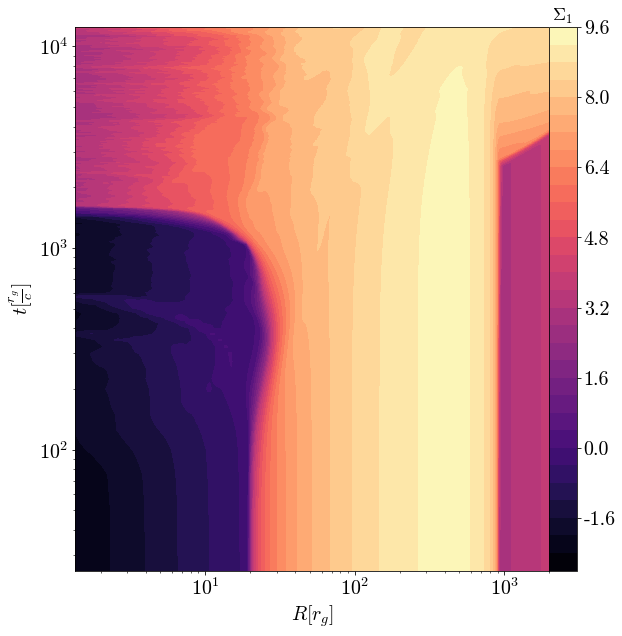

In [75]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 5
# print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Sig_1_n = Sig_st

#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
    np.log10(Sig_1_n[:, :]),
    32,
    cmap="magma",
)

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\Sigma_1$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 2e3)
plt.ylim(time[1], np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

### $\Sigma_2$

(500,)
(384,)
(500, 384)


C:\Users\Beverly\Documents\HAMR_macros\pp.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  
C:\Users\Beverly\Documents\HAMR_macros\pp.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  import pdb


Text(0.5, 0, '$R[r_g]$')

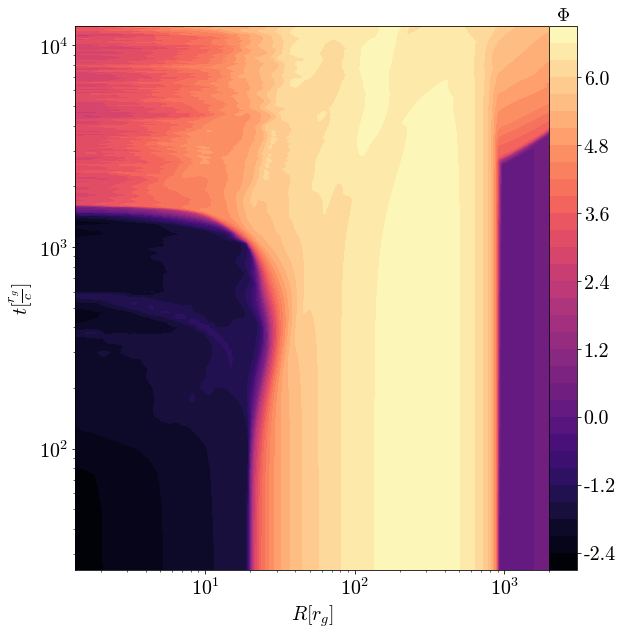

In [77]:
# plt.semilogx(r,Psi[150,:])
Nt_1 = 0
# Nt_2 = 500
Nt_2 = time.max()

N_Dt = 1
print(time.shape)
print(r[0,:,ny//2,0].shape)
print(Sig_2_n.shape)
# print(t.max())
N_r = r_cells #.max()

# Psi_0 = Psi[:, 0]
#Psi_n = Tls.moving_average_2d(Psi, N_Dt)
Sig_2_n = Sig_st_2

#v = np.nanmax(Psi_n[Nt_1:Nt_2, :N_r]) / 10

plt.figure(figsize=(10, 10))
ax = plt.gca()

plt.contourf(
    r[0,:,ny//2,0],
    time,
    np.log10(Sig_2_n[:, :]),
    32,
    cmap="magma",
)

clb1 = plt.colorbar(pad=0)
clb1.ax.set_title(r"$\Phi$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.xlim(rhor, 2e3)
plt.ylim(time[1], np.max(time))
#plt.ylim(500, time[Nt_2])

plt.ylabel(r"$t[\frac{r_g}{c}]$")
plt.xlabel(r"$R[r_g]$")

# Plot quantity vs. time

In [ ]:
### Load files

# Uncooled
an9_vtime = np.load()
an5_vtime = np.load()
a0_vtime = np.load()
a2_vtime = np.load()
a3_vtime = np.load()
a5_vtime = np.load()

# cooled
an9c_vtime = np.load()
an5c_vtime = np.load()
a0c_vtime = np.load()
a2c_vtime = np.load()
a3c_vtime = np.load()
a5c_vtime = np.load()
a94c_vtime = np.load()

## All spins, $h/r=0.1$

### $\dot{M}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], a0c_vtime["fM"],label="0.2", alpha=0.5)
plt.plot(a2c_vtime["t"], a2c_vtime["fM"],label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], a3c_vtime["fM"],label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], a5c_vtime["fM"],label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], a94c_vtime["fM"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\dot{M}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Phi_{BH}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], a0c_vtime["PhiBH"],label="0.2", alpha=0.5)
plt.plot(a2c_vtime["t"], a2c_vtime["PhiBH"],label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], a3c_vtime["PhiBH"],label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], a5c_vtime["PhiBH"],label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], a94c_vtime["PhiBH"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\phi_{BH}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], a0c_vtime["phiBH"],label="0.0", alpha=0.5)
plt.plot(a2c_vtime["t"], a2c_vtime["phiBH"],label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], a3c_vtime["phiBH"],label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], a5c_vtime["phiBH"],label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], a94c_vtime["phiBH"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\eta_{EM}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], -a0c_vtime["fEM"]/a0c_vtime["fM"]*100,label="0.0", alpha=0.5)
plt.plot(a2c_vtime["t"], -a2c_vtime["fEM"]/a2c_vtime["fM"]*100,label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], -a3c_vtime["fEM"]/a3c_vtime["fM"]*100,label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], -a5c_vtime["fEM"]/a5c_vtime["fM"]*100,label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], -a94c_vtime["fEM"]/a94c_vtime["fM"]*100,label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\eta_{EM}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Sigma_1$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], a0c_vtime["Sigma_1"],label="0.0", alpha=0.5)
plt.plot(a2c_vtime["t"], a2c_vtime["Sigma_1"],label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], a3c_vtime["Sigma_1"],label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], a5c_vtime["Sigma_1"],label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], a94c_vtime["Sigma_1"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Sigma_{1}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Sigma_2$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0c_vtime["t"], a0c_vtime["Sigma_2"],label="0.0", alpha=0.5)
plt.plot(a2c_vtime["t"], a2c_vtime["Sigma_2"],label="0.2", alpha=0.5)
plt.plot(a3c_vtime["t"], a3c_vtime["Sigma_2"],label="0.3", alpha=0.5)
plt.plot(a5c_vtime["t"], a5c_vtime["Sigma_2"],label="0.5", alpha=0.5)
plt.plot(a94c_vtime["t"], a94c_vtime["Sigma_2"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Sigma_{2}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

## All spins, $h/r=0.3$

### $\dot{M}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], a0_vtime["fM"],label="0.2", alpha=0.5)
plt.plot(a2_vtime["t"], a2_vtime["fM"],label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], a3_vtime["fM"],label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], a5_vtime["fM"],label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], a94_vtime["fM"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\dot{M}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.3$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Phi_{BH}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], a0_vtime["PhiBH"],label="0.2", alpha=0.5)
plt.plot(a2_vtime["t"], a2_vtime["PhiBH"],label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], a3_vtime["PhiBH"],label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], a5_vtime["PhiBH"],label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], a94_vtime["PhiBH"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.3$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\phi_{BH}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], a0_vtime["phiBH"],label="0.0", alpha=0.5)
plt.plot(a2_vtime["t"], a2_vtime["phiBH"],label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], a3_vtime["phiBH"],label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], a5_vtime["phiBH"],label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], a94_vtime["phiBH"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.3$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\eta_{EM}$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], -a0_vtime["fEM"]/a0_vtime["fM"]*100,label="0.0", alpha=0.5)
plt.plot(a2_vtime["t"], -a2_vtime["fEM"]/a2_vtime["fM"]*100,label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], -a3_vtime["fEM"]/a3_vtime["fM"]*100,label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], -a5_vtime["fEM"]/a5_vtime["fM"]*100,label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], -a94_vtime["fEM"]/a94_vtime["fM"]*100,label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\eta_{EM}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.3$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Sigma_1$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], a0_vtime["Sigma_1"],label="0.0", alpha=0.5)
plt.plot(a2_vtime["t"], a2_vtime["Sigma_1"],label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], a3_vtime["Sigma_1"],label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], a5_vtime["Sigma_1"],label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], a94_vtime["Sigma_1"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Sigma_{1}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.3$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

### $\Sigma_2$

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(a0_vtime["t"], a0_vtime["Sigma_2"],label="0.0", alpha=0.5)
plt.plot(a2_vtime["t"], a2_vtime["Sigma_2"],label="0.2", alpha=0.5)
plt.plot(a3_vtime["t"], a3_vtime["Sigma_2"],label="0.3", alpha=0.5)
plt.plot(a5_vtime["t"], a5_vtime["Sigma_2"],label="0.5", alpha=0.5)
plt.plot(a94_vtime["t"], a94_vtime["Sigma_2"],label="0.9375", color="red", alpha=0.5)

plt.ylabel(r'$\Sigma_{2}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

## Comparing cooled and uncooled disks

### $a=0.9375$

# Plot spacetime diagrams

## $\Sigma$

## $\Phi_{BH}$

## $\phi_{BH}$

## $a_{\phi}$

## $v_{\phi}$